In [167]:
import pandas as pd
import seaborn as sns

## Challenge 1

In [168]:
df_5_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt')
df_5_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt')
df_5_w3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt')
df_5_w4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt')
df_6_w1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
df_6_w2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
df_5_w1.shape

(206857, 11)

In [169]:
df = pd.concat([df_5_w1, df_5_w2, df_5_w3, df_5_w4, df_6_w1, df_6_w2]).reset_index()
df.shape

(1231795, 12)

In [170]:
df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020


## Challenge 2

In [171]:
#concat date and time columns

df['DATETIME'] = df['DATE'] + " " + df['TIME']
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])

df = df.drop(columns = 'index')
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATETIME'],
      dtype='object')

## Challenge 3

In [172]:
df_group = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATETIME']).agg('sum').reset_index()
#confirm no duplicate datetimes 
(df_group
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)
df_group

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2019-04-27 00:00:00,7035249,2384833
1,A002,R051,02-00-00,59 ST,2019-04-27 04:00:00,7035269,2384840
2,A002,R051,02-00-00,59 ST,2019-04-27 08:00:00,7035292,2384875
3,A002,R051,02-00-00,59 ST,2019-04-27 12:00:00,7035392,2384951
4,A002,R051,02-00-00,59 ST,2019-04-27 16:00:00,7035651,2385020
...,...,...,...,...,...,...,...
1231778,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-05 17:00:00,5554,379
1231779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-05 21:00:00,5554,379
1231780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-06 01:00:00,5554,379
1231781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-06 05:00:00,5554,379


In [173]:
df_daily = (df.groupby(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE'], as_index = False).ENTRIES.first())
df_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-04-27,7035249
1,A002,R051,02-00-00,59 ST,2019-04-28,7036100
2,A002,R051,02-00-00,59 ST,2019-04-29,7036746
3,A002,R051,02-00-00,59 ST,2019-04-30,7038242
4,A002,R051,02-00-00,59 ST,2019-05-01,7039729
...,...,...,...,...,...,...
203004,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-02,5554
203005,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-03,5554
203006,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-04,5554
203007,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-06-05,5554


In [174]:
df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['DATE', 'ENTRIES']
                                    .apply(lambda grp: grp.shift(1)))

<ipython-input-174-bc70613c2733>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily[['PREV_DATE', 'PREV_ENTRIES']] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])['DATE', 'ENTRIES']


In [175]:
print(df_daily.shape)
df_daily.dropna(subset = ['PREV_DATE'], axis = 0, inplace = True)
print(df_daily.shape)

(203009, 8)
(198127, 8)


In [262]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    return counter

In [264]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

In [265]:
df_daily['DAILY_ENTRIES'] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)
df_daily[df_daily.DAILY_ENTRIES == df_daily.DAILY_ENTRIES.max()]

158 1087620.0
482 4317177.0
107 7245002.0
4050695 5903004.0
7246468 4050451.0
882 15418815.0
1435 4767402.0
335092671 3422305.0
412 3073070.0
161 4605408.0
681 6527713.0
569320813 4807409.0
279 9029146.0
65536 839317244.0
184608117 746094.0
80 2586370.0
238 2898346.0
50 1544092.0
607 3912014.0
196614 2998692.0
514 3755842.0
8 2020892.0
3003 6999467.0
408 8876564.0
1178879075 4471988.0
149 1252884.0
4666 2201975.0
14 1327005.0
196633 68461839.0
200 36966261.0
1017 2357557.0
12 4887309.0
7 9441168.0
1058702 102390686.0
393355 1661809141.0
10 7602347.0
1463 1068632.0
29 6332751.0
30933207 6069289.0
71 7192933.0
115 12739117.0
1122 6546797.0
16779493 81157.0
637574909 2502854.0
231 637595004.0
68859156 436510383.0
607126914 594465.0
140397413 1577638340.0
458752 100663296.0
23 203977549.0
452993428 1830432.0
259 7480462.0
20 3000575.0
683737068 458752.0
905996437 3558247.0
0 5176463.0
7 13653544.0
182 10462950.0
2063649382 8123310.0
1129054878 2501599.0


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
119806,PTH13,R541,00-04-00,THIRTY ST,2019-05-19,706,2019-05-18,899109.0,898403.0


In [254]:
df_daily[df_daily.STATION == 'BROOKLYN BRIDGE']

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
150694,R210,R044,00-00-00,BROOKLYN BRIDGE,2019-04-28,68335369,2019-04-27,68335075.0,294.0
150695,R210,R044,00-00-00,BROOKLYN BRIDGE,2019-04-29,68335830,2019-04-28,68335369.0,461.0
150696,R210,R044,00-00-00,BROOKLYN BRIDGE,2019-04-30,68336653,2019-04-29,68335830.0,823.0
150697,R210,R044,00-00-00,BROOKLYN BRIDGE,2019-05-01,68337523,2019-04-30,68336653.0,870.0
150698,R210,R044,00-00-00,BROOKLYN BRIDGE,2019-05-02,68338083,2019-05-01,68337523.0,560.0
...,...,...,...,...,...,...,...,...,...
151402,R210A,R044,03-06-01,BROOKLYN BRIDGE,2019-06-03,1419166,2019-06-02,1419151.0,15.0
151403,R210A,R044,03-06-01,BROOKLYN BRIDGE,2019-06-04,1419449,2019-06-03,1419166.0,283.0
151404,R210A,R044,03-06-01,BROOKLYN BRIDGE,2019-06-05,1419718,2019-06-04,1419449.0,269.0
151405,R210A,R044,03-06-01,BROOKLYN BRIDGE,2019-06-06,1420023,2019-06-05,1419718.0,305.0


## Challenge 4

In [266]:
%matplotlib inline

In [267]:
import matplotlib.pyplot as plt

In [268]:
single_turn = df_daily[(df_daily['C/A'] == 'R236') & (df_daily['UNIT'] == 'R045') & 
                       (df_daily['SCP'] == '00-00-00') & (df_daily['STATION'] == 'GRD CNTRL-42 ST')]

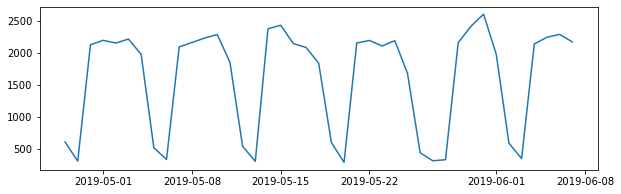

In [269]:
plt.figure(figsize=(10,3))
plt.plot(single_turn['DATE'],single_turn['DAILY_ENTRIES'])

In [270]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].UNIT.unique()

array(['R045', 'R046', 'R047', 'R048'], dtype=object)

In [271]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST']['C/A'].unique()

array(['R236', 'R237', 'R237B', 'R238', 'R238A', 'R240', 'R241A'],
      dtype=object)

In [272]:
df_group[df_group.STATION == 'GRD CNTRL-42 ST'].SCP.unique()

array(['00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-00-04',
       '00-00-05', '00-03-00', '00-03-01', '00-03-02', '00-03-03',
       '00-06-00', '00-06-01', '01-00-00', '01-00-01', '01-00-02',
       '01-00-03', '01-00-04', '01-00-05', '01-00-06', '00-00-06',
       '00-00-07', '00-03-04', '00-05-00', '00-05-01', '00-06-02',
       '02-00-00', '02-00-01', '02-00-02', '02-00-03', '02-00-04',
       '02-03-00', '02-03-01', '02-03-02', '00-03-05', '00-03-06',
       '00-03-07', '00-03-08'], dtype=object)

## Challenge 5

In [273]:
df_c5 = df_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).agg({'DAILY_ENTRIES': 'sum', 'PREV_ENTRIES': 'sum', 
                                                                  'ENTRIES': 'sum'}).reset_index()

In [274]:
df_c5.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,PREV_ENTRIES,ENTRIES
0,A002,R051,59 ST,2019-04-28,8394.0,55109712.0,55118106
1,A002,R051,59 ST,2019-04-29,6337.0,55118106.0,55124443
2,A002,R051,59 ST,2019-04-30,13132.0,55124443.0,55137575
3,A002,R051,59 ST,2019-05-01,13664.0,55137575.0,55151239
4,A002,R051,59 ST,2019-05-02,13748.0,55151239.0,55164987


## Challenge 6

In [275]:
df_c6 = df_daily.groupby(['STATION', 'DATE']).agg({'DAILY_ENTRIES': 'sum', 'PREV_ENTRIES': 'sum', 
                                                                  'ENTRIES': 'sum'}).reset_index()

In [276]:
df_c6.head()

,STATION,DATE,DAILY_ENTRIES,PREV_ENTRIES,ENTRIES
0,1 AV,2019-04-28,6338.0,1.413315e+09,1413321232
1,1 AV,2019-04-29,4555.0,1.413321e+09,1413325787
2,1 AV,2019-04-30,18018.0,1.413326e+09,1413343805
3,1 AV,2019-05-01,18923.0,1.413344e+09,1413362728
4,1 AV,2019-05-02,19226.0,1.413363e+09,1413381954


## Challenge 7

In [277]:
df_c6_bb = df_c6[df_c6.STATION == '183 ST'].reset_index()
df_c6_bb.shape

(41, 6)

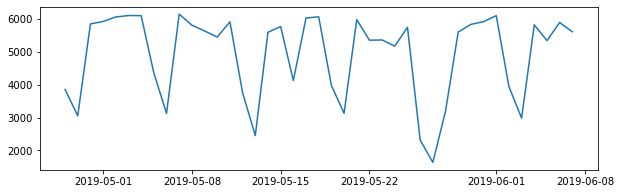

In [278]:
plt.figure(figsize=(10,3))
plt.plot(df_c6_bb['DATE'],df_c6_bb['DAILY_ENTRIES'])
#plt.xticks(['2019-05-12', '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16'])
#plt.xlim(['2019-05-27', '2019-06-05'])
#plt.ylim([0.1e10,1e10])

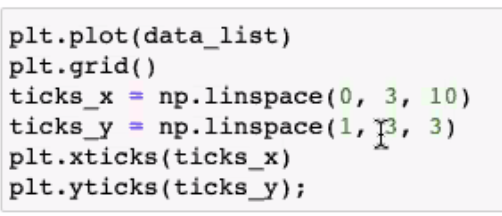

## Challenge 8

In [191]:
weekday = df_c6_bb.drop(['PREV_ENTRIES', 'ENTRIES', 'index'], axis = 1)

In [192]:
weekday.head()

,STATION,DATE,DAILY_ENTRIES
0,BROOKLYN BRIDGE,2019-04-28,11143.0
1,BROOKLYN BRIDGE,2019-04-29,6712.0
2,BROOKLYN BRIDGE,2019-04-30,22427.0
3,BROOKLYN BRIDGE,2019-05-01,22469.0
4,BROOKLYN BRIDGE,2019-05-02,22231.0


In [397]:
weekday['DATE_SHIFT'] = weekday['DATE'] + pd.DateOffset(days=1)
weekday['WEEKDAY'] = weekday['DATE_SHIFT'].dt.day_name()
weekday['WEEK'] = weekday['DATE_SHIFT'].dt.week
weekday.head()

,STATION,DATE,DAILY_ENTRIES,WEEKDAY,WEEK,DATE_SHIFT
0,BROOKLYN BRIDGE,2019-04-28,11143.0,Monday,18,2019-04-29
1,BROOKLYN BRIDGE,2019-04-29,6712.0,Tuesday,18,2019-04-30
2,BROOKLYN BRIDGE,2019-04-30,22427.0,Wednesday,18,2019-05-01
3,BROOKLYN BRIDGE,2019-05-01,22469.0,Thursday,18,2019-05-02
4,BROOKLYN BRIDGE,2019-05-02,22231.0,Friday,18,2019-05-03


Overall recommendation: XYZ
    
    1) most popular station
        - bar chart with top 10
        - (if we have time) map representation/indicate geographical clusters on barchart
        - indicate how many stations will be chosen
   
    2) most popular group of turnstiles
        - 2/3 per station?
        
    3) best day of the week
        - 1 to 2


In [166]:
weekday.STATION.unique()

array(['BROOKLYN BRIDGE'], dtype=object)

In [416]:
#df_c6 = df_c6.drop(['PREV_ENTRIES', 'ENTRIES'], axis = 1)
df_c6.head()

,STATION,DATE,DAILY_ENTRIES,WEEKDAY,WEEK
0,1 AV,2019-04-28,6338.0,Sunday,17
1,1 AV,2019-04-29,4555.0,Monday,18
2,1 AV,2019-04-30,18018.0,Tuesday,18
3,1 AV,2019-05-01,18923.0,Wednesday,18
4,1 AV,2019-05-02,19226.0,Thursday,18


In [450]:
df_c6['DATE_SHIFT'] = df_c6['DATE'] + pd.DateOffset(days=-1)
df_c6['WEEKDAY'] = df_c6['DATE_SHIFT'].dt.day_name()
df_c6['WEEK'] = df_c6['DATE_SHIFT'].dt.week
df_c6.head()

,STATION,DATE,DAILY_ENTRIES,WEEKDAY,WEEK,DATE_SHIFT
0,1 AV,2019-04-28,6338.0,Saturday,17,2019-04-27
1,1 AV,2019-04-29,4555.0,Sunday,17,2019-04-28
2,1 AV,2019-04-30,18018.0,Monday,18,2019-04-29
3,1 AV,2019-05-01,18923.0,Tuesday,18,2019-04-30
4,1 AV,2019-05-02,19226.0,Wednesday,18,2019-05-01


In [451]:
df_c6_d17 = df_c6[(df_c6['WEEK'] != 17) & (df_c6['WEEK'] != 23)]
df_c6_d17.WEEK.value_counts()

22    2645
21    2640
20    2639
19    2637
18    2637
Name: WEEK, dtype: int64

In [452]:
df_c6_d17.head()

,STATION,DATE,DAILY_ENTRIES,WEEKDAY,WEEK,DATE_SHIFT
2,1 AV,2019-04-30,18018.0,Monday,18,2019-04-29
3,1 AV,2019-05-01,18923.0,Tuesday,18,2019-04-30
4,1 AV,2019-05-02,19226.0,Wednesday,18,2019-05-01
5,1 AV,2019-05-03,19745.0,Thursday,18,2019-05-02
6,1 AV,2019-05-04,20046.0,Friday,18,2019-05-03


In [453]:
df_week = df_c6_d17.groupby(['STATION', 'WEEK']).agg('sum').reset_index()
df_week.head()

,STATION,WEEK,DAILY_ENTRIES
0,1 AV,18,107652.0
1,1 AV,19,106758.0
2,1 AV,20,108946.0
3,1 AV,21,107751.0
4,1 AV,22,92758.0


In [454]:
df_week = df_week.groupby('STATION').agg('mean').reset_index()
df_week.head()

,STATION,WEEK,DAILY_ENTRIES
0,1 AV,20.0,104773.0
1,103 ST,20.0,188559.4
2,103 ST-CORONA,20.0,125926.2
3,104 ST,20.0,27019.8
4,110 ST,20.0,66246.6


In [455]:
df_week = df_week.drop('WEEK', axis = 1)

In [456]:
df_week_sorted = df_week.sort_values(by = 'DAILY_ENTRIES', ascending = False).reset_index()

In [457]:
df_week_sorted.head(20)
df_week_sorted['AVG_WEEKLY_ENTRIES'] = df_week_sorted['DAILY_ENTRIES']
df_week_sorted.head()

,index,STATION,DAILY_ENTRIES,AVG_WEEKLY_ENTRIES
0,61,34 ST-PENN STA,1064290.6,1064290.6
1,232,GRD CNTRL-42 ST,891950.6,891950.6
2,314,PATH NEW WTC,845690.8,845690.8
3,352,TIMES SQ-42 ST,807833.2,807833.2
4,46,23 ST,764613.0,764613.0


In [458]:
top_weekly_avg = df_week_sorted.head(10)
top_weekly_avg

,index,STATION,DAILY_ENTRIES,AVG_WEEKLY_ENTRIES
0,61,34 ST-PENN STA,1064290.6,1064290.6
1,232,GRD CNTRL-42 ST,891950.6,891950.6
2,314,PATH NEW WTC,845690.8,845690.8
3,352,TIMES SQ-42 ST,807833.2,807833.2
4,46,23 ST,764613.0,764613.0
5,59,34 ST-HERALD SQ,764343.4,764343.4
6,14,14 ST-UNION SQ,731598.2,731598.2
7,68,42 ST-PORT AUTH,653464.0,653464.0
8,225,FULTON ST,625888.0,625888.0
9,110,86 ST,619370.4,619370.4


In [459]:
import seaborn as sns

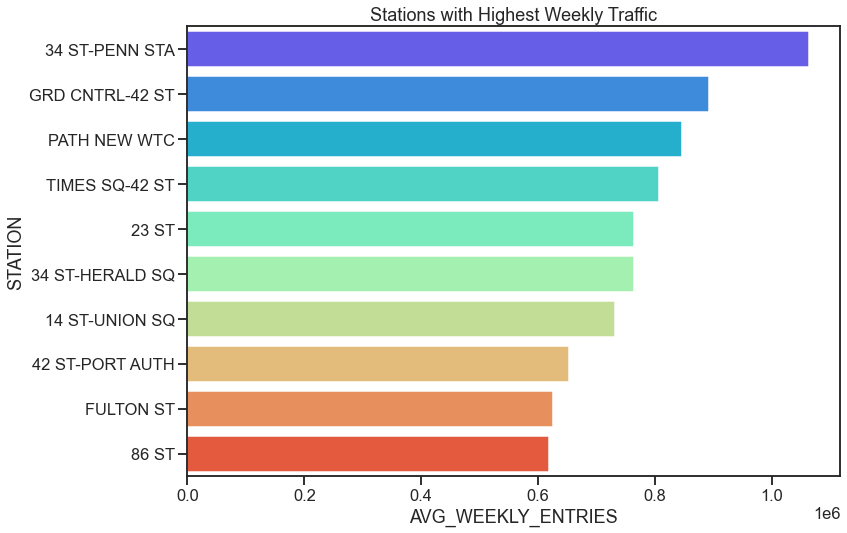

In [460]:
sns.set_context('talk')
sns.set_style("ticks")
g = sns.barplot(data = top_weekly_avg, y = 'STATION', x = 'AVG_WEEKLY_ENTRIES', palette = 'rainbow')

#for item in g.get_xticklabels():
#    item.set_rotation(90)
g.set_title('Stations with Highest Weekly Traffic')
g.figure.savefig('top_10.png', bbox_inches = 'tight')
# *also pull map and/or grey out bars related to cluster*

In [461]:
dataframe = df_c6_d17
station1 = '34 ST-PENN STA'
station2 = 'GRD CNTRL-42 ST'
station3 = 'PATH NEW WTC'
station4 = 'TIMES SQ-42 ST'

In [466]:
filtered_by_station = dataframe[(dataframe.STATION == station1) |
                               (dataframe.STATION == station2) |
                               (dataframe.STATION == station3)]
filtered_by_station.head()

,STATION,DATE,DAILY_ENTRIES,WEEKDAY,WEEK,DATE_SHIFT
2501,34 ST-PENN STA,2019-04-30,169571.0,Monday,18,2019-04-29
2502,34 ST-PENN STA,2019-05-01,176127.0,Tuesday,18,2019-04-30
2503,34 ST-PENN STA,2019-05-02,177186.0,Wednesday,18,2019-05-01
2504,34 ST-PENN STA,2019-05-03,178299.0,Thursday,18,2019-05-02
2505,34 ST-PENN STA,2019-05-04,170839.0,Friday,18,2019-05-03


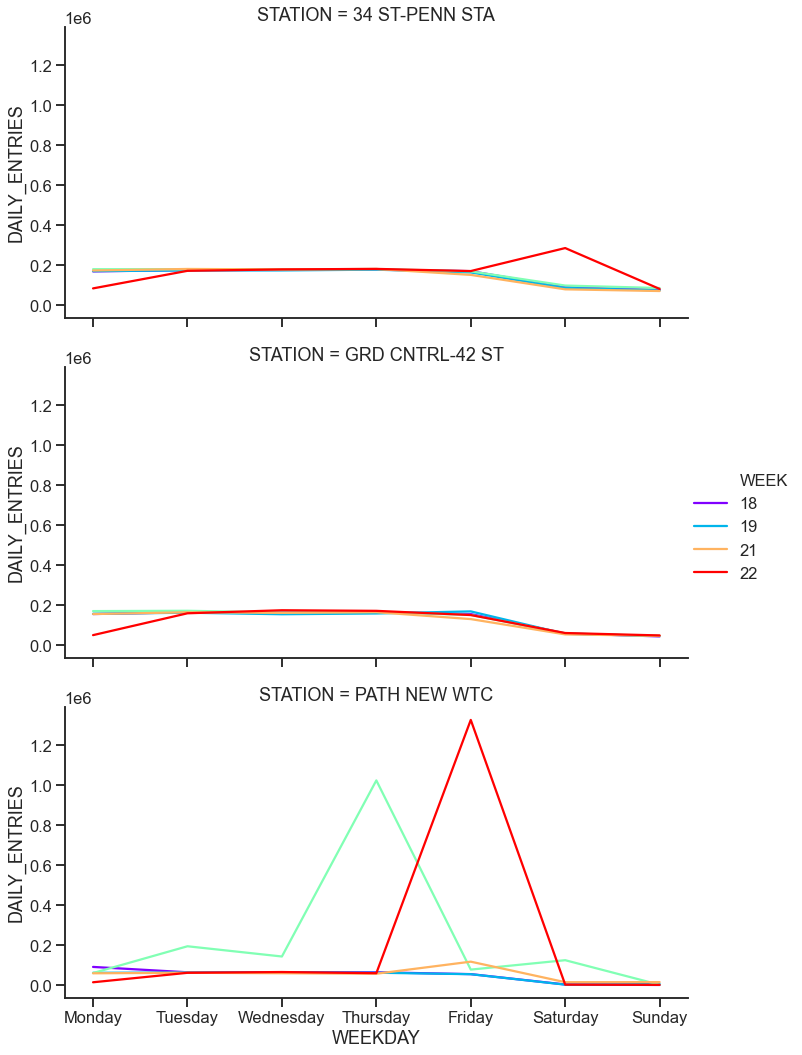

In [467]:
sns.relplot(data = filtered_by_station, 
            x = 'WEEKDAY', 
            y = 'DAILY_ENTRIES',
           row = 'STATION',
            hue = 'WEEK',
            kind = 'line',
            sort = False,
            aspect = 2,
            palette = 'rainbow'
           )

In [468]:
filtered_by_station_reduced_max = filtered_by_station[filtered_by_station.DAILY_ENTRIES < 0.5e+06]

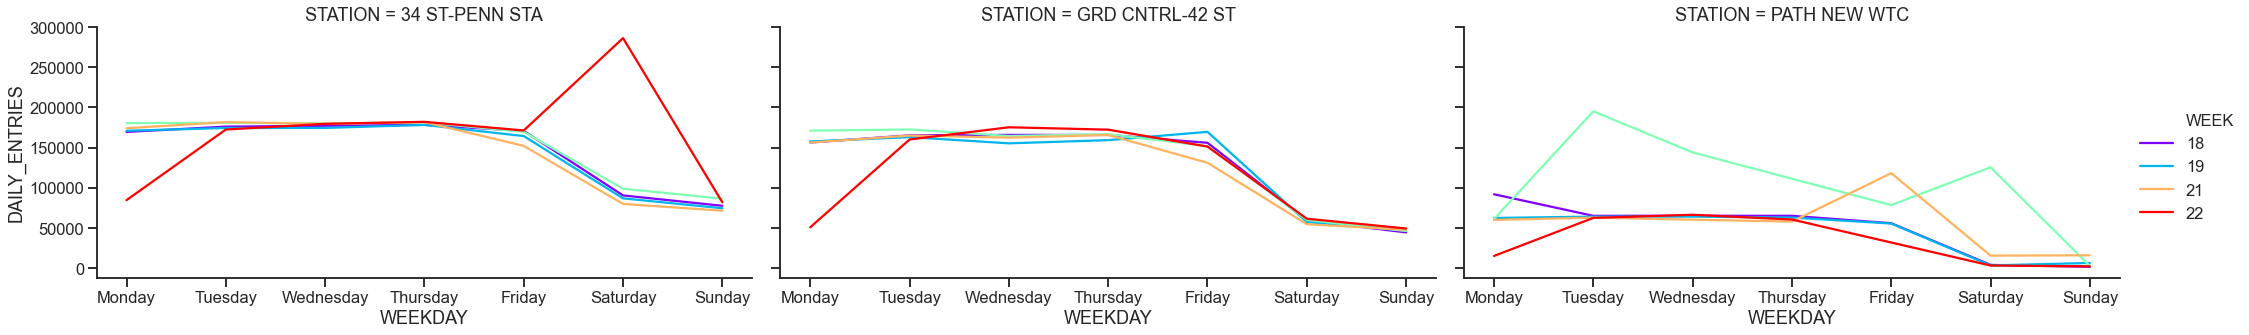

In [471]:
g = sns.relplot(data = filtered_by_station_reduced_max, 
            x = 'WEEKDAY', 
            y = 'DAILY_ENTRIES',
           col = 'STATION',
            hue = 'WEEK',
            kind = 'line',
            sort = False,
            aspect = 2,
            palette = 'rainbow'
           )

g.savefig('weekday_by_station.png', bbox_inches = 'tight')